In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Loading Dataset and EDA

1. Reading Dataset

In [2]:
df = pd.read_csv('/kaggle/input/dataset/data.csv', low_memory=False)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Print the count of null values in each column
print(df.isnull().sum())



id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# Print the columns in the dataset
print(df.columns)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [6]:

# Print the columns in the dataset
print(df.head)


<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [7]:
# Drop the first and last columns from the DataFrame
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)

In [8]:
# # Prints all the unique values for all columns
# print(df["diagnosis"].unique())
# print(df["radius_mean"].unique())
# print(df["texture_mean"].unique())
# print(df["perimeter_mean"].unique())
# print(df["area_mean"].unique())
# print(df["smoothness_mean"].unique())
# print(df["smoothness_mean"].unique())
# print(df["compactness_mean"].unique())
# print(df["concavity_mean"].unique())
# print(df["concave points_mean"].unique())
# print(df["symmetry_mean"].unique())
# print(df["fractal_dimension_mean"].unique())
# print(df["radius_se"].unique())
# print(df["texture_se"].unique())
# print(df["perimeter_se"].unique())
# print(df["area_se"].unique())
# print(df["smoothness_se"].unique())
# print(df["compactness_se"].unique())
# print(df["concavity_se"].unique())
# print(df["concave points_se"].unique())
# print(df["symmetry_se"].unique())
# print(df["fractal_dimension_se"].unique())
# print(df["radius_worst"].unique())
# print(df["texture_worst"].unique())
# print(df["perimeter_worst"].unique())
# print(df["area_worst"].unique())
# print(df["smoothness_worst"].unique())
# print(df["compactness_worst"].unique())
# print(df["concavity_worst"].unique())
# print(df["concave points_worst"].unique())
# print(df["symmetry_worst"].unique())
# print(df["fractal_dimension_worst"].unique())


In [9]:
# Replace the values M and B with Malignant and Benign in the diagnosis column
df["diagnosis"] = df["diagnosis"].replace("M", "Malignant", regex=True)
df["diagnosis"] = df["diagnosis"].replace("B", "Benign", regex=True)
df['diagnosis'].unique()

array(['Malignant', 'Benign'], dtype=object)

In [10]:
# Get the unique diagnosis labels before encoding and store them in unique_diagnosis variable
unique_diagnosis = df['diagnosis'].unique()
df['diagnosis'] = pd.factorize(df.diagnosis)[0]
df['diagnosis'].unique()

array([0, 1])

2. Finding the count of each diagnosis

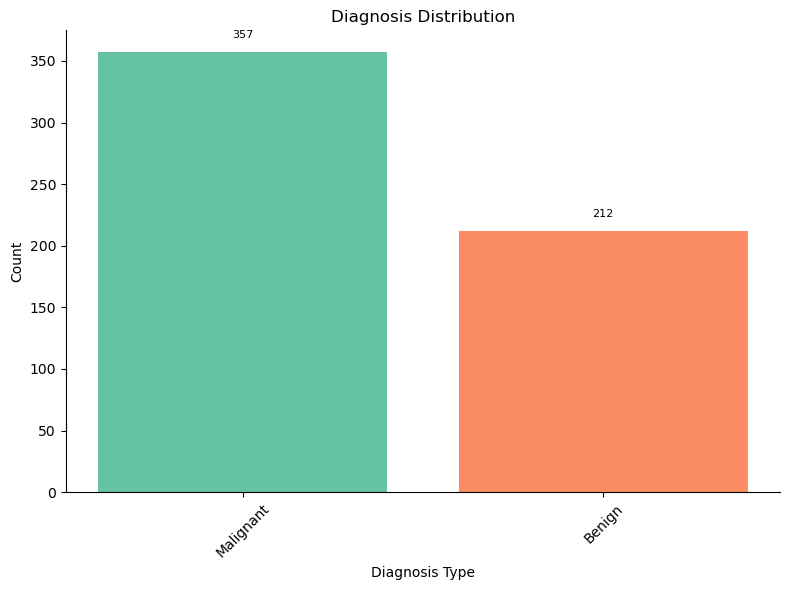

In [11]:

# Choose a color palette
palette = sns.color_palette('Set2')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Extract the diagnosis counts
diagnosis_counts = df['diagnosis'].value_counts()

# Plot the bar chart with the chosen color palette
ax.bar(unique_diagnosis, diagnosis_counts.values, color=palette)

# Set title and labels
ax.set_title('Diagnosis Distribution')
ax.set_xlabel('Diagnosis Type')
ax.set_ylabel('Count')

# Customize tick labels
ax.tick_params(axis='x', rotation=45, labelsize=10)

# Add data labels
for i, count in enumerate(diagnosis_counts.values):
    ax.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=8)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.tight_layout()
plt.show()

3. Our dataset already contains the mean values of all the columns. So Lets find the correlation between columns. 


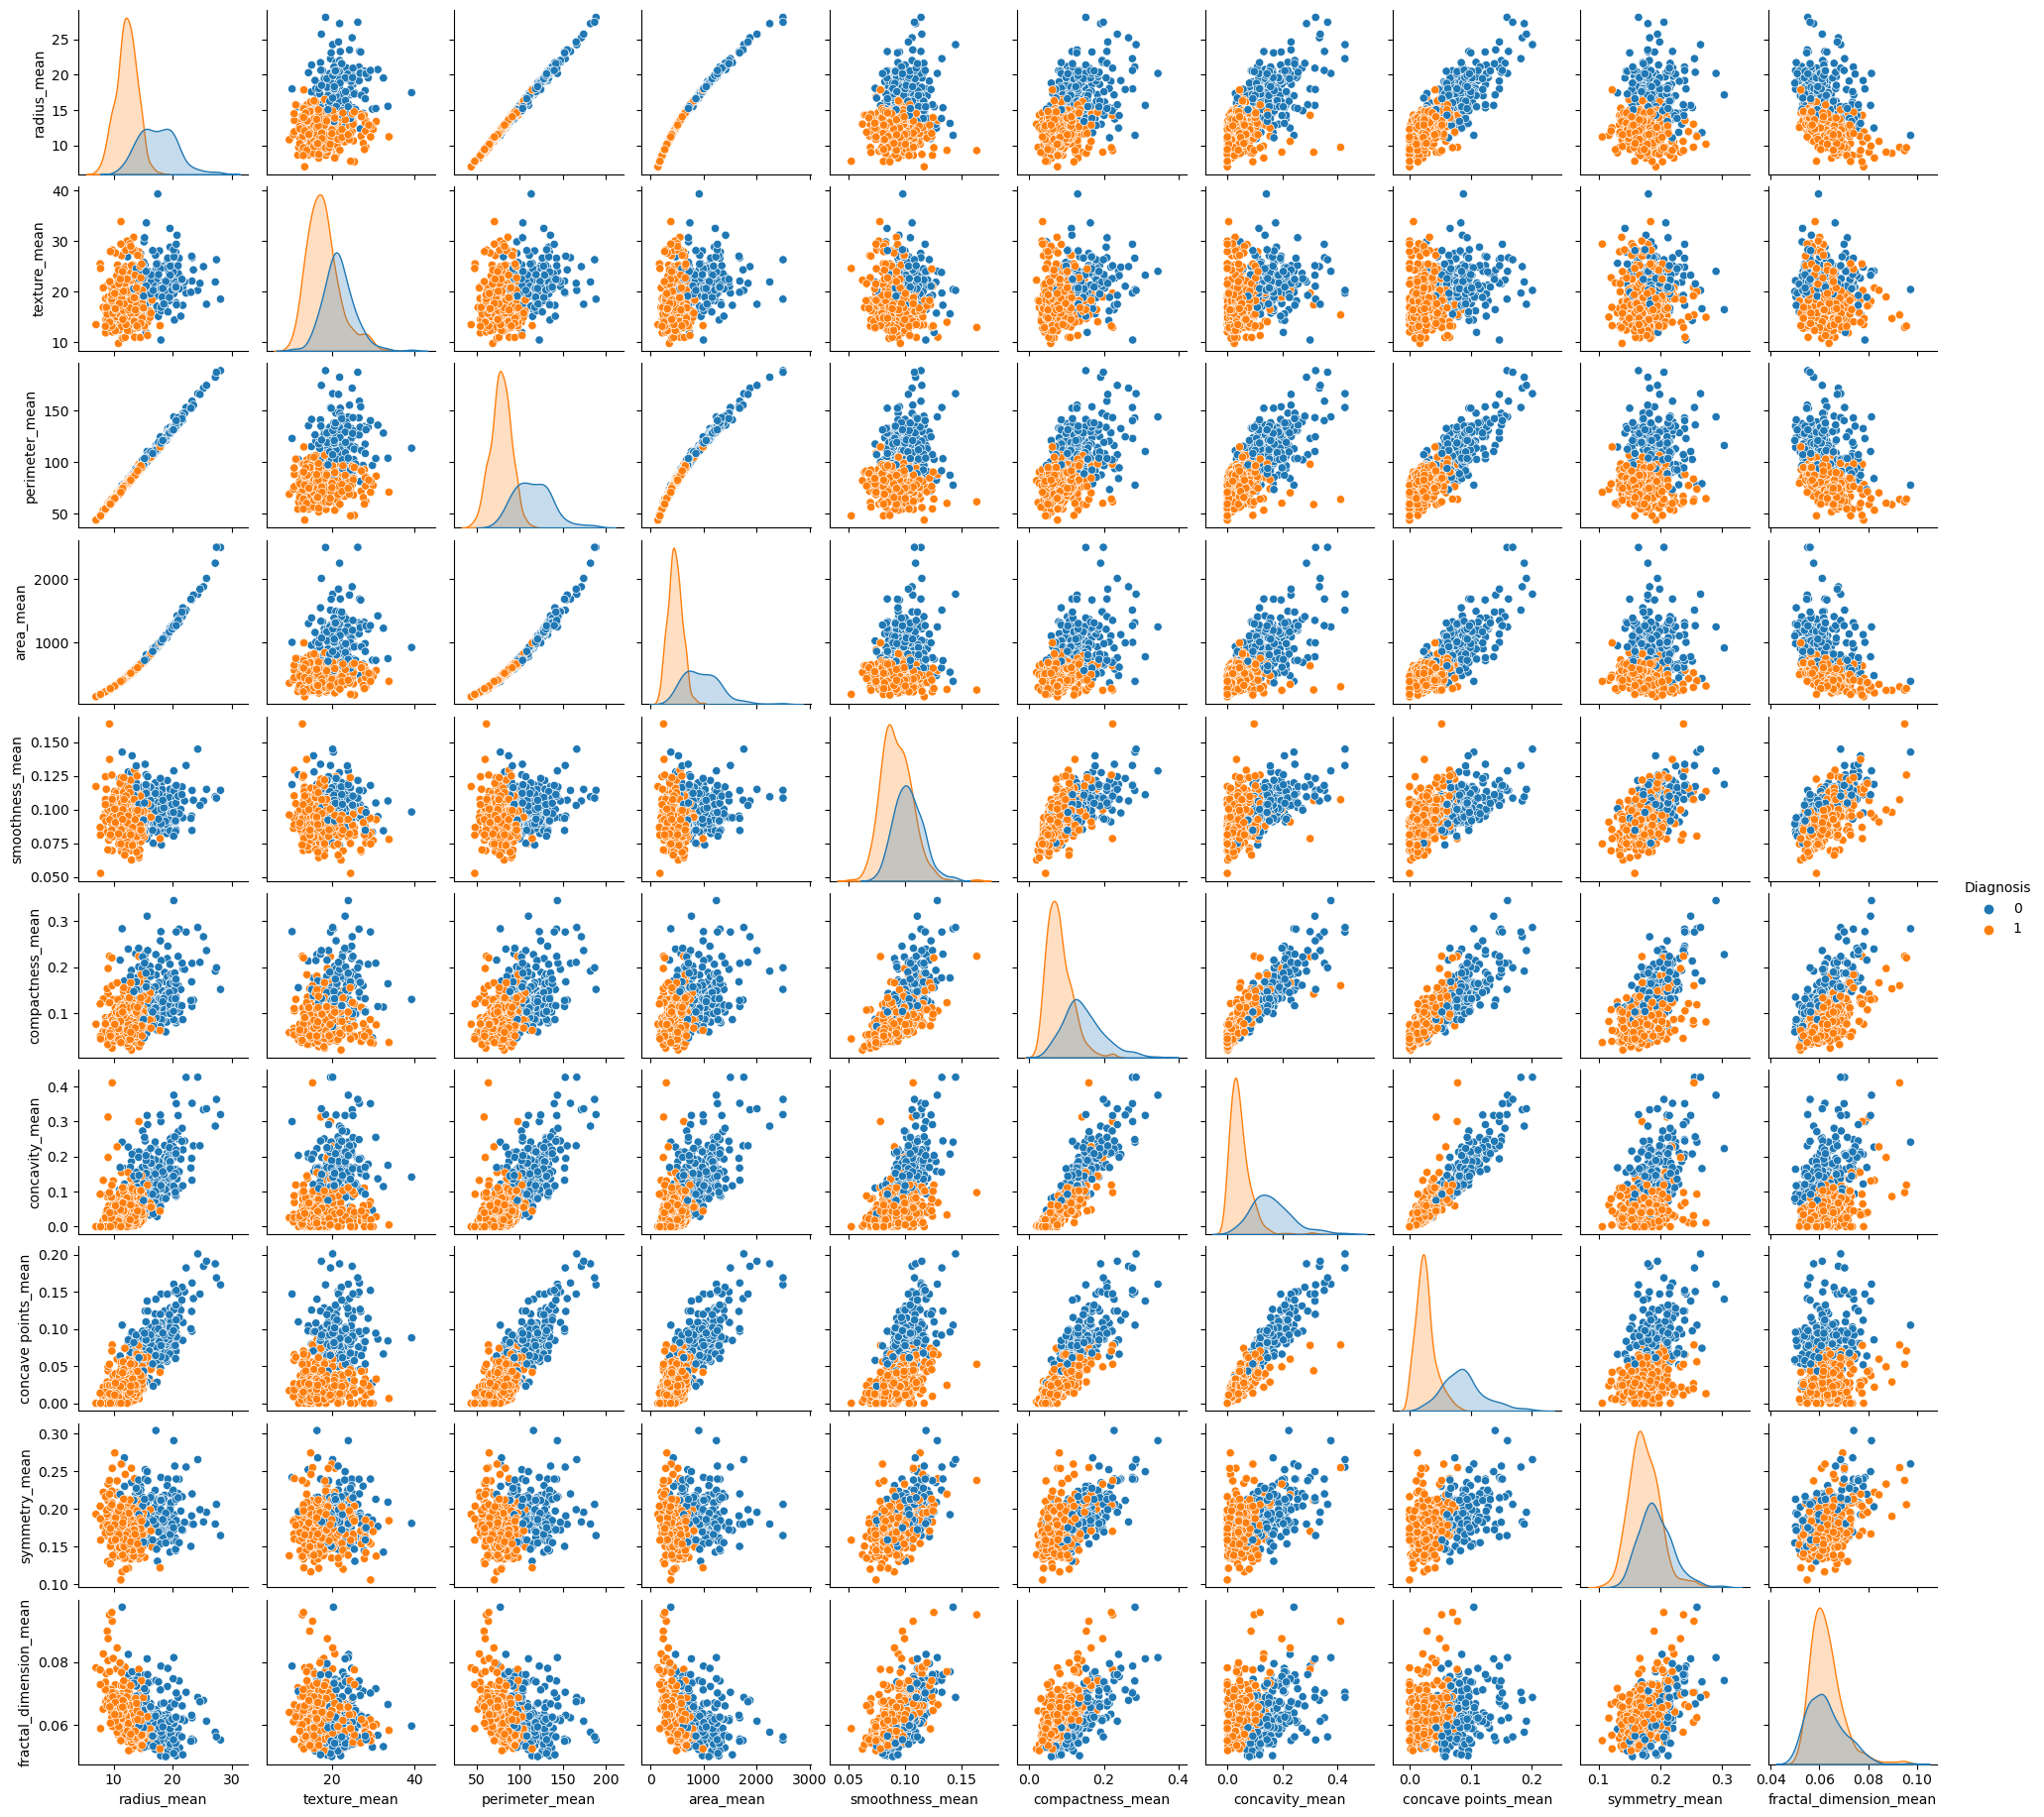

In [12]:
featureMeans = list(df.columns[0:11])
correlationData = df[featureMeans].corr()
pairplot = sns.pairplot(df[featureMeans], diag_kind='kde', height=2, hue='diagnosis')
pairplot._legend.set_title('Diagnosis')
pairplot.fig.subplots_adjust(top=0.92)  # Adjust the top margin for the legend

4. Pairplot is too big and complicated to understand. Lets try a heatmap



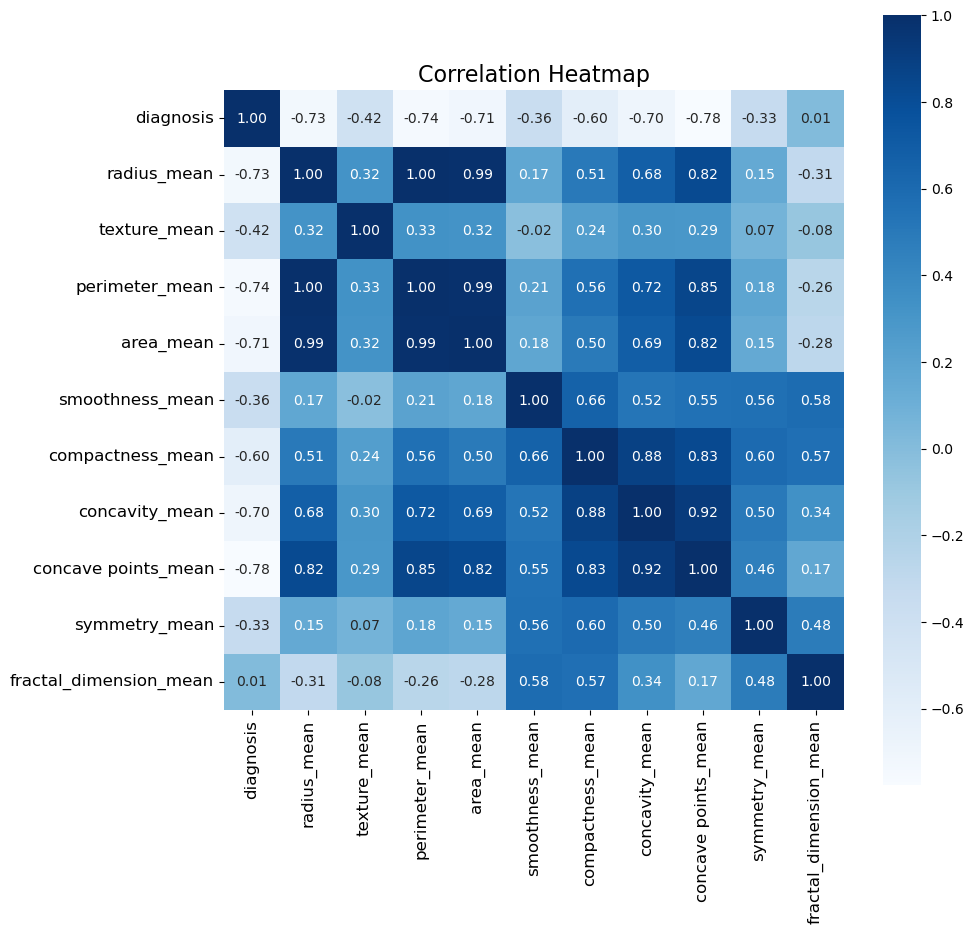

In [13]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df[featureMeans].corr(), annot=True, fmt='.2f', square=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontsize=16)

# Increase font size for correlation values and axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)

plt.show()

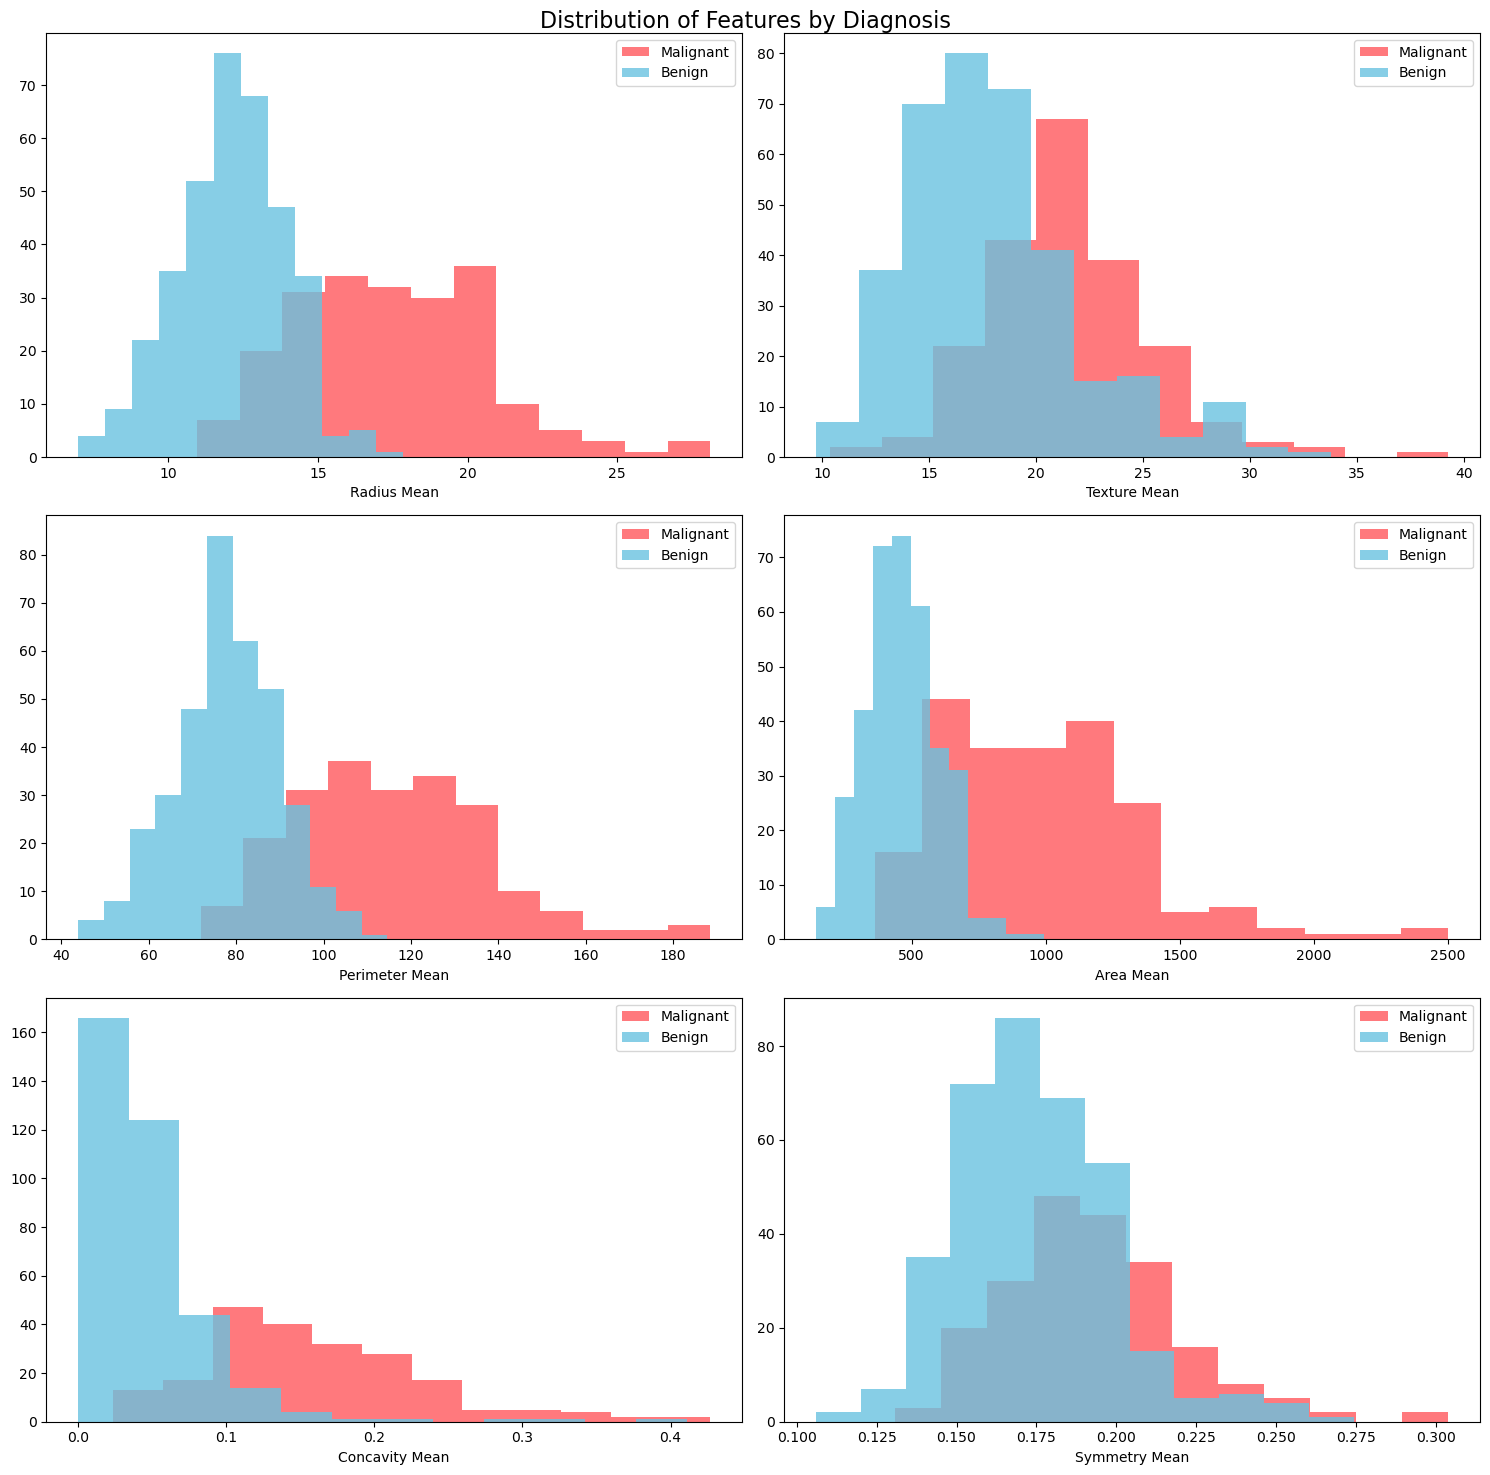

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

df['diagnosis'] = pd.to_numeric(df['diagnosis'])

bins = 12
plt.figure(figsize=(15, 15))

color_malignant = '#FF585D'  # Red color for malignant
color_benign = '#69C2E0'  # Blue color for benign

plt.subplot(3, 2, 1)
plt.hist(df[df['diagnosis'] == 0]['radius_mean'], bins=bins, color=color_malignant, label='Malignant', alpha=0.8)
plt.hist(df[df['diagnosis'] == 1]['radius_mean'], bins=bins, color=color_benign, label='Benign', alpha=0.8)
plt.xlabel('Radius Mean')
plt.legend()

plt.subplot(3, 2, 2)
plt.hist(df[df['diagnosis'] == 0]['texture_mean'], bins=bins, color=color_malignant, label='Malignant', alpha=0.8)
plt.hist(df[df['diagnosis'] == 1]['texture_mean'], bins=bins, color=color_benign, label='Benign', alpha=0.8)
plt.xlabel('Texture Mean')
plt.legend()

plt.subplot(3, 2, 3)
plt.hist(df[df['diagnosis'] == 0]['perimeter_mean'], bins=bins, color=color_malignant, label='Malignant', alpha=0.8)
plt.hist(df[df['diagnosis'] == 1]['perimeter_mean'], bins=bins, color=color_benign, label='Benign', alpha=0.8)
plt.xlabel('Perimeter Mean')
plt.legend()

plt.subplot(3, 2, 4)
plt.hist(df[df['diagnosis'] == 0]['area_mean'], bins=bins, color=color_malignant, label='Malignant', alpha=0.8)
plt.hist(df[df['diagnosis'] == 1]['area_mean'], bins=bins, color=color_benign, label='Benign', alpha=0.8)
plt.xlabel('Area Mean')
plt.legend()

plt.subplot(3, 2, 5)
plt.hist(df[df['diagnosis'] == 0]['concavity_mean'], bins=bins, color=color_malignant, label='Malignant', alpha=0.8)
plt.hist(df[df['diagnosis'] == 1]['concavity_mean'], bins=bins, color=color_benign, label='Benign', alpha=0.8)
plt.xlabel('Concavity Mean')
plt.legend()

plt.subplot(3, 2, 6)
plt.hist(df[df['diagnosis'] == 0]['symmetry_mean'], bins=bins, color=color_malignant, label='Malignant', alpha=0.8)
plt.hist(df[df['diagnosis'] == 1]['symmetry_mean'], bins=bins, color=color_benign, label='Benign', alpha=0.8)
plt.xlabel('Symmetry Mean')
plt.legend()

plt.suptitle('Distribution of Features by Diagnosis', fontsize=16)
plt.tight_layout()
plt.show()


# Machine Learing Models

In [15]:
X = df.loc[:,featureMeans]
Y = df.loc[:, 'diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

1. Random Forest

In [16]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
rfc.score(X_train,Y_train)
Y_pred = rfc.predict(X_test)


In [17]:
rcf_accuracy_train = rfc.score(X_train, Y_train)
rcf_accuracy_test = rfc.score(X_test, Y_test)
print("Random Forest Training Accuracy:", rcf_accuracy_train)
print("Random Forest Test Accuracy:", rcf_accuracy_test)


Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 1.0


In [18]:
rcf_accuracy_train = rfc.score(X_train, Y_train)
rcf_accuracy_test = rfc.score(X_test, Y_test)
print("Random Forest Training Accuracy:", rcf_accuracy_train)
print("Random Forest Test Accuracy:", rcf_accuracy_test)


Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 1.0


In [19]:
# Define the mapping between encoded values and labels
label_mapping = {0: 'Malignant', 1: 'Benign'}

# Decode the predicted labels
decoded_labels = [label_mapping[value] for value in Y_pred]

print("Decoded Predicted Values for the Test Dataset:")
print()
print(decoded_labels)


Decoded Predicted Values for the Test Dataset:

['Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Malignant', 'Malignant', 'Maligna

In [20]:

# Generate classification report
report = classification_report(Y_test, Y_pred)

# Print the classification report
print("Random Forest Classification Report:")
print(report)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        71

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



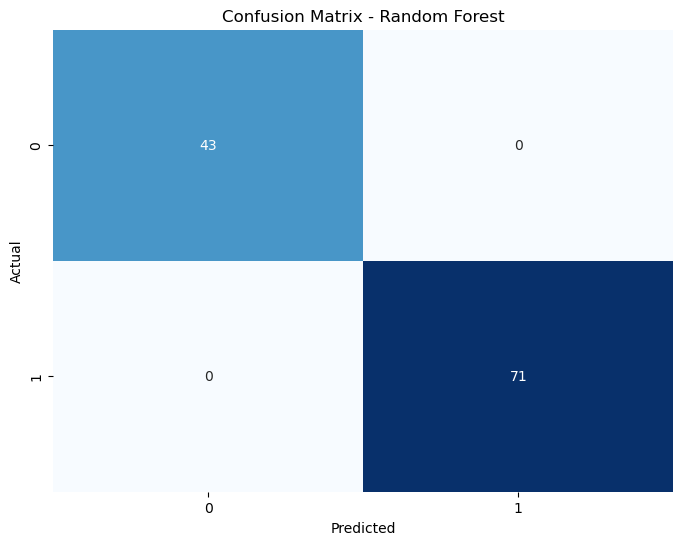

In [21]:


# Predict labels for the test dataset
Y_pred = rfc.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


2. K-Nearest Neighbors

In [22]:

clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)

In [23]:

clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)

knn_train_accuracy = accuracy_score(Y_train, clf.predict(X_train))
knn_test_accuracy = accuracy_score(Y_test, clf.predict(X_test))

print("Train Accuracy:", knn_train_accuracy)
print("Test Accuracy:", knn_test_accuracy)


Train Accuracy: 0.9010989010989011
Test Accuracy: 0.9385964912280702


In [24]:
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)
KNN_prediction = clf.predict(X_test)

# Define the mapping between encoded values and labels
label_mapping = {0: 'Malignant', 1: 'Benign'}

# Decode the predicted labels
decoded_KNN_labels = [label_mapping[value] for value in KNN_prediction]

print("Decoded Predicted Values for the Test Dataset:")
print()
print(decoded_KNN_labels)


Decoded Predicted Values for the Test Dataset:

['Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Ben

In [25]:
# Compute and display the classification report
report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        71

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



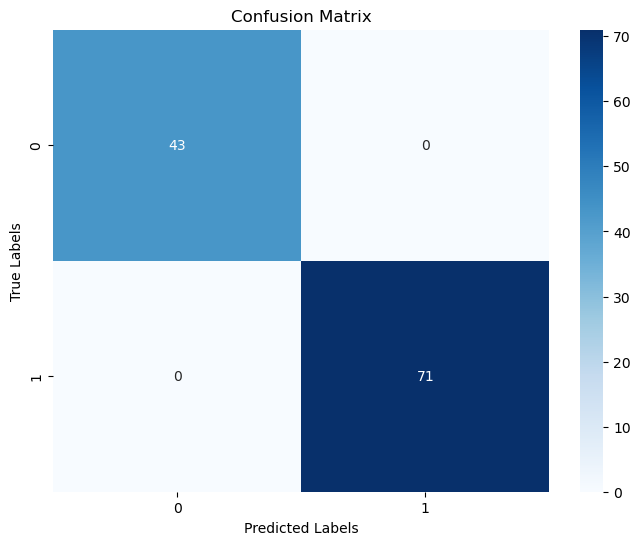

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap using the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


3. Support Vector Machine

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear Kernel SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, Y_train)
Y_train_pred_linear = svm_linear.predict(X_train)
Y_test_pred_linear = svm_linear.predict(X_test)
linear_svm_accuracy_train_linear = accuracy_score(Y_train, Y_train_pred_linear)
linear_svm_accuracy_test_linear = accuracy_score(Y_test, Y_test_pred_linear)
print("Linear Kernel SVM Training Accuracy:", linear_svm_accuracy_train_linear)
print("Linear Kernel SVM Test Accuracy:", linear_svm_accuracy_test_linear)

print()

# Gaussian (RBF) Kernel SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, Y_train)
Y_train_pred_rbf = svm_rbf.predict(X_train)
Y_test_pred_rbf = svm_rbf.predict(X_test)
accuracy_train_rbf = accuracy_score(Y_train, Y_train_pred_rbf)
accuracy_test_rbf = accuracy_score(Y_test, Y_test_pred_rbf)
print("Gaussian Kernel SVM Training Accuracy:", accuracy_train_rbf)
print("Gaussian Kernel SVM Test Accuracy:", accuracy_test_rbf)


Linear Kernel SVM Training Accuracy: 1.0
Linear Kernel SVM Test Accuracy: 1.0

Gaussian Kernel SVM Training Accuracy: 0.8593406593406593
Gaussian Kernel SVM Test Accuracy: 0.9210526315789473


In [28]:
# Define the mapping between encoded values and labels
label_mapping = {0: 'Malignant', 1: 'Benign'}

# Decode the predicted labels
decoded_SVM_labels = [label_mapping[value] for value in Y_pred]

print("Decoded Predicted Values for the Test Dataset:")
print()
print(decoded_SVM_labels)


Decoded Predicted Values for the Test Dataset:

['Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Malignant', 'Malignant', 'Maligna

In [29]:
report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        71

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



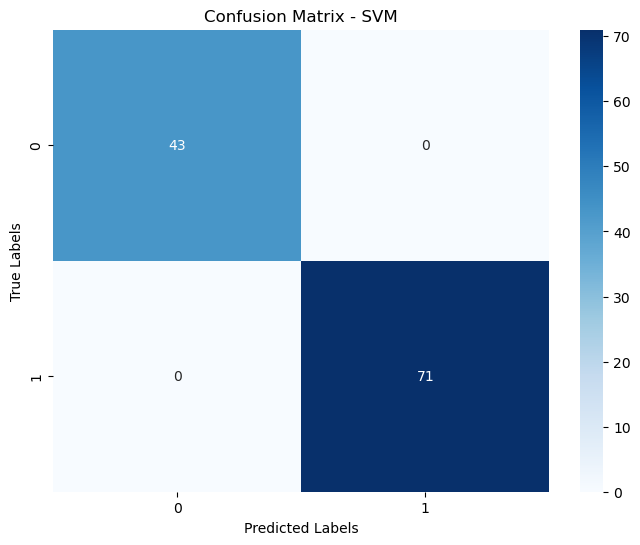

In [30]:
SVM_cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(SVM_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


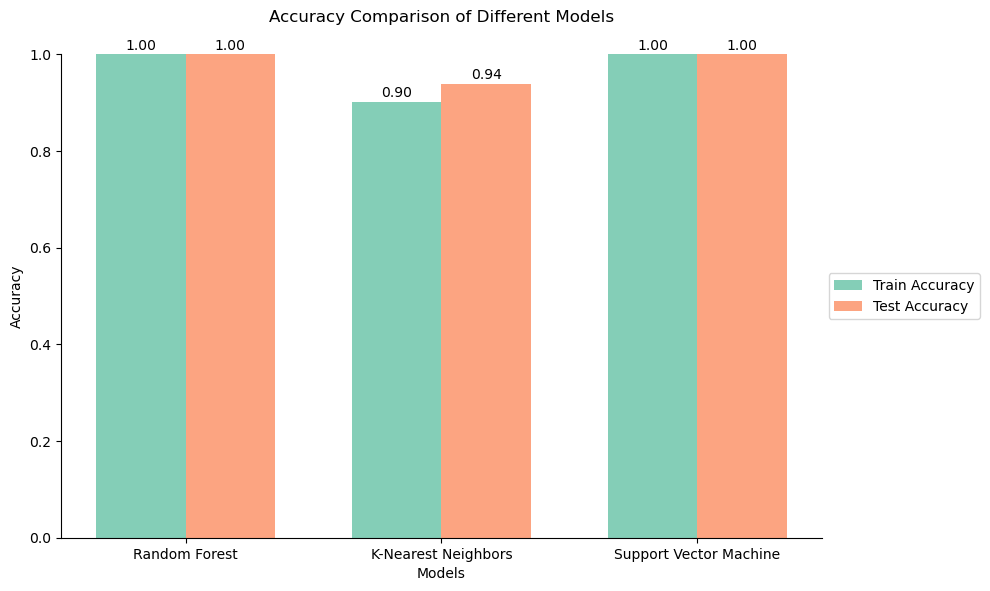

In [31]:
import numpy as np
import seaborn as sns

# Define the accuracy values for each model
train_accuracies = [rcf_accuracy_train, knn_train_accuracy, linear_svm_accuracy_train_linear]
test_accuracies = [rcf_accuracy_test, knn_test_accuracy, linear_svm_accuracy_test_linear]

# Define the model names
model_names = ['Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine']

# Set the color palette
colors = sns.color_palette('Set2')

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions_train = np.arange(len(model_names))
bar_positions_test = bar_positions_train + bar_width

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bar_positions_train, train_accuracies, label='Train Accuracy', color=colors[0], width=bar_width, alpha=0.8)
plt.bar(bar_positions_test, test_accuracies, label='Test Accuracy', color=colors[1], width=bar_width, alpha=0.8)

# Add data labels above each bar
for i, train_acc in enumerate(train_accuracies):
    plt.text(bar_positions_train[i], train_acc + 0.01, f'{train_acc:.2f}', ha='center', color='black')

for i, test_acc in enumerate(test_accuracies):
    plt.text(bar_positions_test[i], test_acc + 0.01, f'{test_acc:.2f}', ha='center', color='black')

# Customize the chart appearance
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models', y=1.05)  # Adjust the y position of the title
plt.ylim([0, 1])  # Set the y-axis limit from 0 to 1
plt.xticks(bar_positions_train + bar_width/2, model_names)

# Move the legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Remove the spines (borders) of the chart
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()  # Add spacing between the title and the chart
plt.show()
